In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = np.array(x_train,dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test,dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
x_train = x_train/ 255                                     
x_test = x_test/ 255

In [4]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
                           tf.keras.layers.LeakyReLU(0.1),
                           tf.keras.layers.MaxPooling2D((2,2)),                           
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(32,activation='relu'),
                           tf.keras.layers.Dense(10,activation='softmax'),
])

In [5]:
from tensorflow.keras.callbacks import Callback

# Define a custom callback to modify the learning rate
class LearningRateScheduler(Callback):
    def __init__(self, initial_lr, decay_steps, decay_rate):
        super().__init__()
        self.initial_lr = initial_lr
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.decay_steps == 0:
            new_lr = self.initial_lr * self.decay_rate
            tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)
            print(f"Learning rate set to {new_lr} at the end of epoch {epoch + 1}")

# Define the initial learning rate
initial_learning_rate = 0.001

# Define the decay steps (every 5 epochs)
decay_steps = 5

# Define the decay rate
decay_rate = 0.1

# Create an Adam optimizer
optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create the custom callback
lr_scheduler = LearningRateScheduler(initial_lr=initial_learning_rate, decay_steps=decay_steps, decay_rate=decay_rate)

# Train the model
# history = model.fit(train_arr, train_label_arr, epochs=50, callbacks=[lr_scheduler])

In [6]:
model_history = model.fit(
    x_train, y_train,
    epochs=15,
    callbacks=[lr_scheduler],
    verbose=1
)

Epoch 1/15


1563/1563 [==============================] - 46s 29ms/step - loss: 1.5457 - accuracy: 0.4293
Epoch 2/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0709 - accuracy: 0.6197
Epoch 3/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9030 - accuracy: 0.6855
Epoch 4/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8037 - accuracy: 0.7206
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7292 - accuracy: 0.7458
Epoch 6/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.5751 - accuracy: 0.7978
Epoch 7/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.5356 - accuracy: 0.8123
Epoch 8/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.5088 - accuracy: 0.8210
Epoch 9/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4949 - accuracy: 0.8256
Epoch 10/15
1563/1563 [==============================] - 47s 3

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5613 - accuracy: 0.8136


[0.5613387227058411, 0.8136000037193298]

In [8]:
model.save('cnn_model_v3.keras')

In [9]:
loaded_model = tf.keras.models.load_model('cnn_model_v2.keras')

1/1 [==============================] - 0s 21ms/step
[[8.8189438e-05 4.8393099e-07 2.8585601e-03 6.8675327e-01 2.3473352e-01
  7.0268966e-02 3.5759925e-03 1.4277815e-03 1.7707518e-04 1.1614558e-04]]
Output Label: 3
cat
[4.]


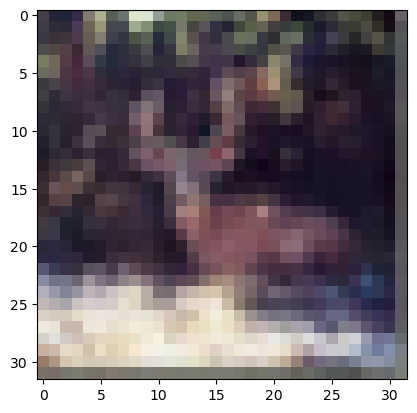

In [16]:
ar = 890
plt.imshow(x_test[ar])

labels = ["airplane","automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
import cv2

resized_img = cv2.resize(x_test[ar], (32,32))
resized_img= np.expand_dims(resized_img, axis=0)

pre=loaded_model.predict(resized_img)
print(pre)
n = np.argmax(pre)                                                     

print("Output Label:", n)
print(labels[n])
print(y_test[ar])